# Подготовка таблиц

In [2]:
#импорт библтотек
from matplotlib.figure import Figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
from math import log
import seaborn as sns

In [3]:
#загрузка из csv файла

lap = pd.read_csv('C:/Users/Николай/Jupyter_projects/laptops.csv',encoding='latin-1')
lap.head(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


In [4]:
#количество записей

rows = len(lap)
rows

1303

In [5]:
#Соединим колонки ОС и версия ОС

lap['Operating System'] = np.where(lap['Operating System Version'].isnull(), 
                                   lap['Operating System'],
                                   lap['Operating System'].astype(str) + ' ' +     
                                   lap['Operating System Version'].astype(str))

lap.drop('Operating System Version', axis= 1 , inplace = True )

lap[4:7]

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Euros)
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60"
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,"400,00"
6,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,"2139,97"


In [6]:
#переименуем колонки под стандарты SQL

lap.rename(columns = {'Model Name':'Model',
                      'Screen Size':'Screen_Size',
                      'Operating System':'OS',
                      'Price (Euros)':'Price',
                      ' Storage':'Storage' #позже разделим
                     }, inplace = True )
lap.columns

Index(['Manufacturer', 'Model', 'Category', 'Screen_Size', 'Screen', 'CPU',
       'RAM', 'Storage', 'GPU', 'OS', 'Weight', 'Price'],
      dtype='object')

In [7]:
#в запросе Проверим, что заданные поля оформленны одинаково

q = """
SELECT *
FROM lap
WHERE  Screen_Size NOT LIKE '%"'
       OR RAM NOT LIKE '%GB'
       OR Weight NOT LIKE '%kg'
       OR Storage NOT LIKE '%GB%'
       OR CPU NOT LIKE '%___GHZ'
"""

sqldf(q)

,Manufacturer,Model,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price
0,Lenovo,IdeaPad 320-15IKB,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,"499,00"
1,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,"418,64"
2,HP,ProBook 470,Notebook,"17.3""",Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,"896,00"
3,Acer,Aspire 3,Notebook,"15.6""",1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,"367,00"
4,HP,250 G6,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.86kg,"488,69"
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,"459,00"
262,Lenovo,IdeaPad Y700-15ISK,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,"899,00"
263,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,"549,99"
264,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,"805,99"


In [8]:
#в одной записе вместо kg - kgs)
q = """
SELECT *
FROM lap
WHERE Weight NOT LIKE '%kg'
"""

sqldf(q)

,Manufacturer,Model,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price
0,Asus,Rog G752VL-GC088D,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 965M,No OS,4kgs,"998,00"


In [9]:
#не везде ГГц в ЦПУ с точкой
lap[lap.CPU.str[-5] != '.']

,Manufacturer,Model,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,Weight,Price
5,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,"400,00"
11,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,"344,99"
13,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,"498,90"
20,Asus,Vivobook E200HA,Netbook,"11.6""",1366x768,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,"191,90"
25,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.3kg,"418,64"
...,...,...,...,...,...,...,...,...,...,...,...,...
1198,Acer,Aspire 3,Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3350 2GHz,4GB,1TB HDD,Intel HD Graphics 500,Linux,2.1kg,"272,00"
1216,Acer,E5 774G,Notebook,"17.3""",1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,"598,00"
1230,Lenovo,ThinkPad Yoga,Netbook,"12.5""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.50GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,"1650,00"
1235,HP,15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.1kg,"478,00"


In [10]:
#выделили колонки ГБ хранилища и ГГц ЦПУ, привели числовые поля к типам 
#float, int

lap['Screen_Size'] = lap['Screen_Size'].str.replace('"','').astype(float)
lap['RAM'] = lap['RAM'].str.replace('GB','').astype(int)

lap.insert(8,'Storage_GB', lap['Storage'].\
           str.replace('1TB', '1024').\
           str.replace('2TB', '2048').\
           str.replace('3TB', '3072').\
           str.replace('GB','').\
           str.replace('Flash Storage','').\
           str.replace('Hybrid','').\
           str.replace('SSD','').\
           str.replace('HDD','').map(eval))

lap.insert(6, 'GHz', lap['CPU'].str.rsplit().str[-1].str[:-3].astype(float))


lap['Price'] = lap['Price'].str.replace(',','.').astype(float)

lap['Weight'] = lap['Weight'].str.replace('kg','').str.replace('s','').astype(float)


lap

,Manufacturer,Model,Category,Screen_Size,Screen,CPU,GHz,RAM,Storage,Storage_GB,GPU,OS,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,2.3,8,128GB SSD,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,1.8,8,128GB Flash Storage,128,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,2.5,8,256GB SSD,256,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,2.7,16,512GB SSD,512,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,3.1,8,256GB SSD,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,2.5,4,128GB SSD,128,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,2.5,16,512GB SSD,512,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,1.6,2,64GB Flash Storage,64,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,2.5,6,1TB HDD,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [11]:
lap.dtypes

Manufacturer     object
Model            object
Category         object
Screen_Size     float64
Screen           object
CPU              object
GHz             float64
RAM               int32
Storage          object
Storage_GB        int64
GPU              object
OS               object
Weight          float64
Price           float64
dtype: object

In [12]:
#проверим работу запросов

q = """
SELECT *
FROM lap
WHERE Screen_Size > 13.2
  AND GHz > 2.1
  AND Storage_GB <= 256
  AND Weight < 1.9
  AND Price > 1010.9

ORDER BY Price DESC
"""

sqldf(q).head(10)

,Manufacturer,Model,Category,Screen_Size,Screen,CPU,GHz,RAM,Storage,Storage_GB,GPU,OS,Weight,Price
0,Dell,Precision M5520,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,2.8,8,256GB SSD,256,Nvidia Quadro M1200,Windows 10,1.78,2712.00
1,Lenovo,ThinkPad X1,Notebook,14.0,IPS Panel 2560x1440,Intel Core i7 6600U 2.6GHz,2.6,16,256GB SSD,256,Intel HD Graphics 520,Windows 7,1.10,2620.00
2,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,2.7,8,256GB SSD,256,Intel HD Graphics 620,Windows 10,1.42,2590.00
3,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,2.8,8,256GB SSD,256,Intel HD Graphics 620,Windows 10,1.28,2559.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,2.8,16,256GB SSD,256,AMD Radeon Pro 555,macOS,1.83,2439.97
5,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,2.8,8,256GB SSD,256,Nvidia Quadro M1200,Windows 10,1.78,2408.00
6,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,2.5,8,256GB SSD,256,Intel HD Graphics 520,Windows 10,1.27,2339.00
7,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,2.5,8,256GB SSD,256,Intel HD Graphics 620,Windows 10,1.42,2330.00
8,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,2.5,8,256GB SSD,256,Intel HD Graphics 620,Windows 10,1.28,2277.00
9,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,2.5,8,256GB SSD,256,Intel HD Graphics 520,Windows 10,1.43,2229.00


# Сохранение данных в csv файл

In [ ]:
#path = 'mylaps.csv'
#lap.to_csv(path, encoding='utf-8', index=False)

# подготовка визуализации для приложения

<Axes: ylabel='count(*)'>

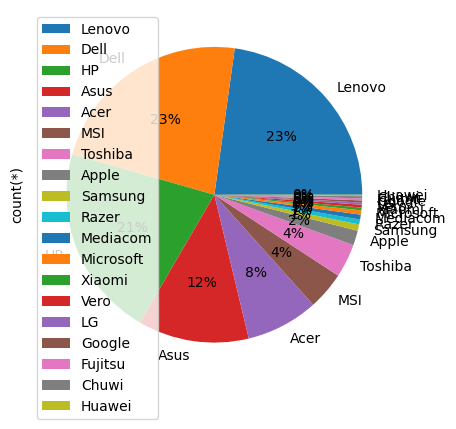

In [13]:
q = sqldf('''
SELECT manufacturer, count(*)
from lap
group by manufacturer
order by count(*) DESC
''')
q.set_index('Manufacturer', inplace=True)
q.plot(kind='pie', y='count(*)', autopct='%1.0f%%')

In [14]:
a = lap.columns[[2,3,5]].to_list()
a

['Category', 'Screen_Size', 'CPU']

Text(0.0, 0.0, 'Total = 1303')

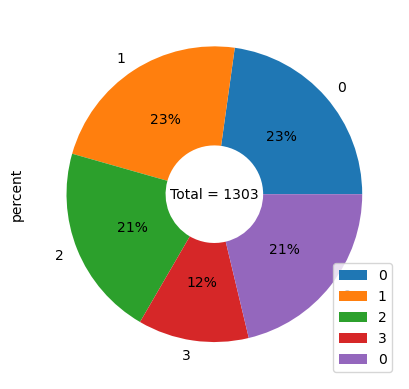

In [15]:
q = sqldf('''
SELECT manufacturer,
       count(*) total,
       
       CAST(100 * sum(count(*)) OVER (ORDER BY count(*) DESC, manufacturer) as real)
           / sum(count(*)) OVER () as cumpercent,
           
       CAST(count(*) * 100 as real)
           / sum(count(*)) over()
           as percent
           
from lap
group by manufacturer
order by count(*) DESC, manufacturer
''')


sumstr = 'Total = ' + q['total'].sum().astype(str)

for k in range(7):
    if q.iloc[k,2] > 67:
        other = pd.DataFrame({'Manufacturer' : 'Other',
                             'percent' : 100 - q.iloc[k,2]},
                             index=[0])
        q = q[:k+1]
        break

q.drop(['total', 'cumpercent'], axis= 1 , inplace= True )
q = pd.concat([q, other])
#q.set_index('Manufacturer', inplace=True)


fig = q.plot(kind='pie', y='percent', autopct='%1.0f%%', wedgeprops=dict(width=0.67))
fig.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center')


Text(0.0, 0.0, 'Total = 1303')

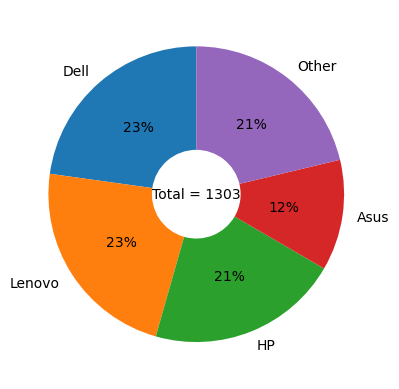

In [16]:
fig = plt.subplot()

plt.pie(q['percent'], wedgeprops=dict(width=0.7),
        autopct='%1.0f%%', startangle=90, labels = q['Manufacturer'])

    #fig = q.plot(kind='pie', y='percent', autopct='%1.0f%%', wedgeprops=dict(width=0.67))
fig.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center')

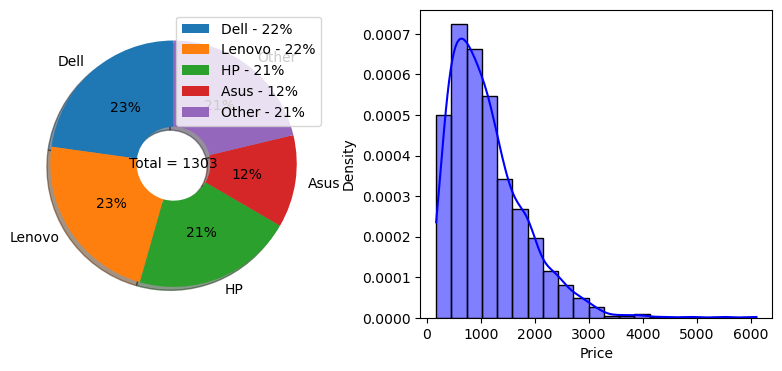

<Figure size 640x480 with 0 Axes>

In [17]:
str_stat = 'Manufacturer'

fig = Figure(figsize=(10,4), dpi = 100)
sns.despine(left=True)
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.pie(q['percent'], wedgeprops=dict(width=0.7),
                      autopct='%1.0f%%', shadow=True, startangle=90, labels = q[str_stat])
ax.text(0., 0., sumstr, horizontalalignment='center', verticalalignment='center')
ax.legend(labels = q[str_stat].astype(str) + ' - ' + q['percent'].astype(int).astype(str) + '%', loc="best")


q2 = sqldf('''
select price
from lap
''')


sns.histplot(q2['Price'], bins = int(log(q2['Price'].sum(), 2) + 1),
                  ax = bx, color = 'blue', kde=True, stat="density", linewidth=1)

fig

In [18]:
q = sqldf('''
SELECT manufacturer,
       count(*) total,
       
       CAST(100 * sum(count(*)) OVER (ORDER BY count(*) DESC, manufacturer) as real)
           / sum(count(*)) OVER () as cumpercent,
           
       CAST(count(*) * 100 as real)
           / sum(count(*)) over()
           as percent
           
from lap
group by manufacturer
order by count(*) DESC, manufacturer
''')

q

,Manufacturer,total,cumpercent,percent
0,Dell,297,22.793553,22.793553
1,Lenovo,297,45.587107,22.793553
2,HP,274,66.615503,21.028396
3,Asus,158,78.741366,12.125863
4,Acer,103,86.646201,7.904835
5,MSI,54,90.790483,4.144282
6,Toshiba,48,94.474290,3.683807
7,Apple,21,96.085955,1.611665
8,Samsung,9,96.776669,0.690714
9,Mediacom,7,97.313891,0.537222


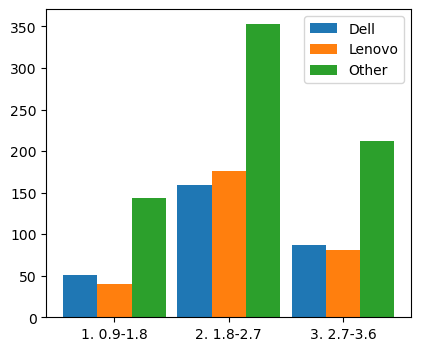

In [21]:
num_stat = 'GHz'
str_stat = 'Manufacturer'

q0 = sqldf('SELECT {0},\
               count(*) total\
                from lap\
                group by {0}\
                order by count(*) DESC, {0}\
                LIMIT 2'.format(str_stat))


top1 = q0.iloc[0,0]
top2 = q0.iloc[1,0]

qmin = lap[num_stat].min()
qmax = lap[num_stat].max()
dot1 = qmin + ((qmax - qmin)/3)
dot2 = 2*qmin + ((qmax - qmin)/3)

q = sqldf('SELECT \
                CASE\
                   WHEN {3} < {6} THEN \'1. {4}-{6}\'\
                   WHEN {3} < {7} THEN \'2. {6}-{7}\'\
                   ELSE \'3. {7}-{5}\'\
                END as q_{3},\
                CASE\
                    WHEN {0} = \'{1}\' THEN \'{1}\'\
                    WHEN {0} = \'{2}\' THEN \'{2}\'\
                    ELSE \'Other\' \
                END as q_{0},\
               count(*) total\
                from lap\
                group by q_{0}, q_{3}\
                order by q_{3}, q_{0}'.format(str_stat, top1, top2, num_stat, qmin, qmax, dot1, dot2))

mfs = sqldf('SELECT distinct q_{0} from q'.format(str_stat))
width = 0.3
        #values = np.arange(len(q))
q_numeric = q['q_'+num_stat].unique()

values = np.arange(len(q_numeric))
q1 = q[q['q_'+str_stat] == mfs.iloc[0, 0]]['total'].to_list()
q2 = q[q['q_'+str_stat] == mfs.iloc[1, 0]]['total'].to_list()
q3 = q[q['q_'+str_stat] == mfs.iloc[2, 0]]['total'].to_list()

fig = Figure(figsize=(16, 4), dpi=100)
hist_multi = fig.add_subplot(132)

hist_multi.bar(values-width, q1, width, label=mfs.iloc[0, 0])
hist_multi.bar(values, q2, width, label=mfs.iloc[1, 0])
hist_multi.bar(values+width, q3, width, label=mfs.iloc[2, 0])
hist_multi.legend()
hist_multi.set_xticks(values, q_numeric)


        
fig   

In [22]:
str_stat = 'manufacturer'

q0 = sqldf('SELECT {0},\
               count(*) total\
        from lap\
        group by {0}\
        order by count(*) DESC, {0}\
        LIMIT 2'.format(str_stat))
q0

,Manufacturer,total
0,Dell,297
1,Lenovo,297


In [23]:
top1 = q0.iloc[0,0]
top1

'Dell'

In [24]:
(lap['Pric'+'e'].max() - lap['Price'].min()) / 3

1975.0

In [27]:
q = sqldf('''SELECT 
        CASE
           WHEN price > 2000 THEN 'high'
           WHEN price > 1000 THEN 'average'
           ELSE 'low'
        END as pricer,
        manufacturer,
       count(*) total,
       sum(count(*)) over () allover
       
           
from lap

WHERE manufacturer in ('Dell', 'Lenovo', 'HP')

group by manufacturer, pricer
order by count(*) DESC, manufacturer
''')
mfs = sqldf('''
SELECT distinct manufacturer
from q
''')

other = pd.DataFrame({'Manufacturer' : 'Other',
                             'total' : q['allover'].iloc[0] - q['total'].sum()},
                             index=[0])

q.drop(['allover'], axis = 1 , inplace = True)
q = pd.concat([q,other])


q

,pricer,Manufacturer,total
0,low,Lenovo,169
1,low,Dell,154
2,low,HP,145
3,average,Dell,109
4,average,HP,109
5,average,Lenovo,96
6,high,Dell,34
7,high,Lenovo,32
8,high,HP,20
0,NaN,Other,0


In [28]:
values = np.arange(len(q))
values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
q_price = q['pricer'].unique()
q_price

array(['low', 'average', 'high', nan], dtype=object)

In [ ]:
ser = 'Manufacturer'

q[ser]